In [1]:
def func (x, y):
    #x is frequency
    #y is the array of paramaters
    #y[0]= v_0 is the center of frequency
    #y[1]= w
    #y[2] = tau
    #y[3]=A
    
    B = (4*(x-y[0])**2)*(y[1]**(-2))*(np.log((-1/y[2])*(np.log((1+np.exp(-1*y[2]))/2))))
    return -1 * y[3] * ((1-np.exp(-1*y[2]*np.exp(B)))/(1-np.exp(-1*y[2])))

In [2]:
params = [78.3, 20.7, 6.5, 0.52]

In [3]:
import numpy as np
z = np.linspace(5, 30 , 40)

In [4]:
v_0 = 1420 #MHz, frequency of 21cm line

In [5]:
def z_to_freq(z):
    return v_0/(z+1)

In [6]:
T = func(z_to_freq(z), params)

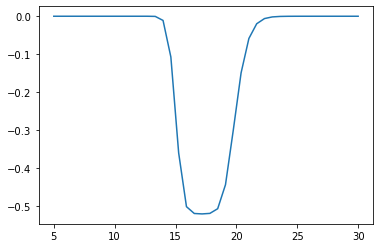

In [7]:
import matplotlib.pyplot as plt
plt.plot (z, T)
# I have to check this with the interpolated version of model from the data to see if they look the same

In [8]:
import pandas as pd
data_1 = pd.read_csv('data_1.csv')

freq_e = data_1.iloc[:,0] #frequency, MHz

T_e = data_1.iloc[:,-1] #21cm brighness temperature, k

model_e = data_1.iloc[:, -2] #the model represented in the paper, k

#Changing the data from frequency to redshift---------------------------------------------------------------------------------
v_0 = 1420 #MHz, frequency of 21cm line
z_e = (v_0/freq_e)-1 #conversion of frequency to redshift

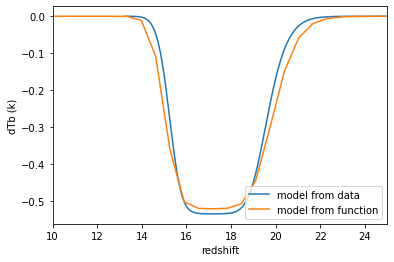

In [9]:
plt.plot(z_e, model_e, label = 'model from data')
plt.plot (z, T, label = 'model from function')
plt.xlabel('redshift')
plt.ylabel('dTb (k)')
plt.xlim(10, 25)
plt.legend()
plt.show()